In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



## Gaussian Naive Bayes

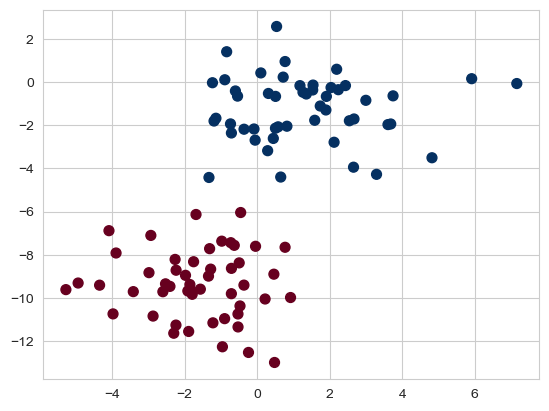

In [3]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, centers=2, cluster_std=1.5, random_state=2)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')

In [4]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X, y)

GaussianNB()

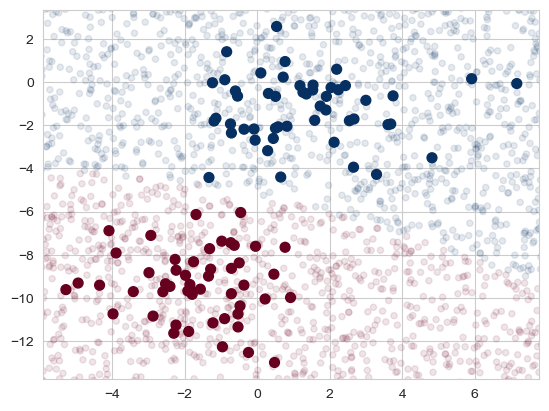

In [5]:
rng = np.random.RandomState(0)

Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = gnb.predict(Xnew)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim);

## Multi nominal Naive bayes

In [6]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [7]:
# Select a few categories and predict them.

categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics']

train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)


In [9]:
# create a pipeline for model fit.

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(TfidfVectorizer(), MultinomialNB())

pipeline.fit(train.data, train.target)
labels = pipeline.predict(test.data)

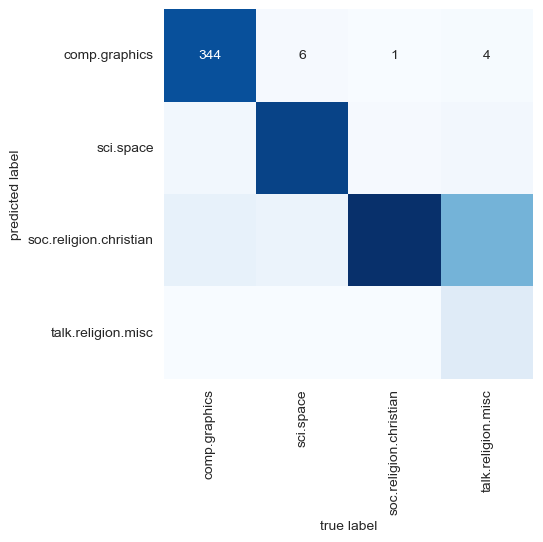

In [10]:
# evaluate the models
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names,
            cmap='Blues')
plt.xlabel('true label')
plt.ylabel('predicted label');

In [11]:
def predict_category(s, train=train, model=pipeline):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [18]:
print(predict_category('sending a payload to the ISS'))
print(predict_category('get out of my house'))
print(predict_category('sending a payload to the ISS'))

sci.space
soc.religion.christian
sci.space
